# Problem Statement


- To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes .

In [ ]:
#Important Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Preprocessing , Normalizing
from sklearn.preprocessing import StandardScaler

#Models

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier

#Metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [ ]:
#Dataset Stats
print(df.shape)

(69301, 13)


In [ ]:
#All are int and float types . understand the stats of dataframe
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Observation

- No Missing Values

- Assuming Age is in Number of Days


- Outliers in Height


- Outliers in systolic Blood Pressure ap_hi



- Outliers in ap_lo


- See cholesterol and glucose are binary will see in the further.


In [ ]:
#Drop ID  and Remove Duplicates
df.drop('id',axis=1,inplace=True)


#Duplicates Removel
df.drop_duplicates(inplace = True)

It is advised to remove the nominal data first then only will be able to drop duplicates it at all they exist.

In [ ]:
df.shape

(69277, 12)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


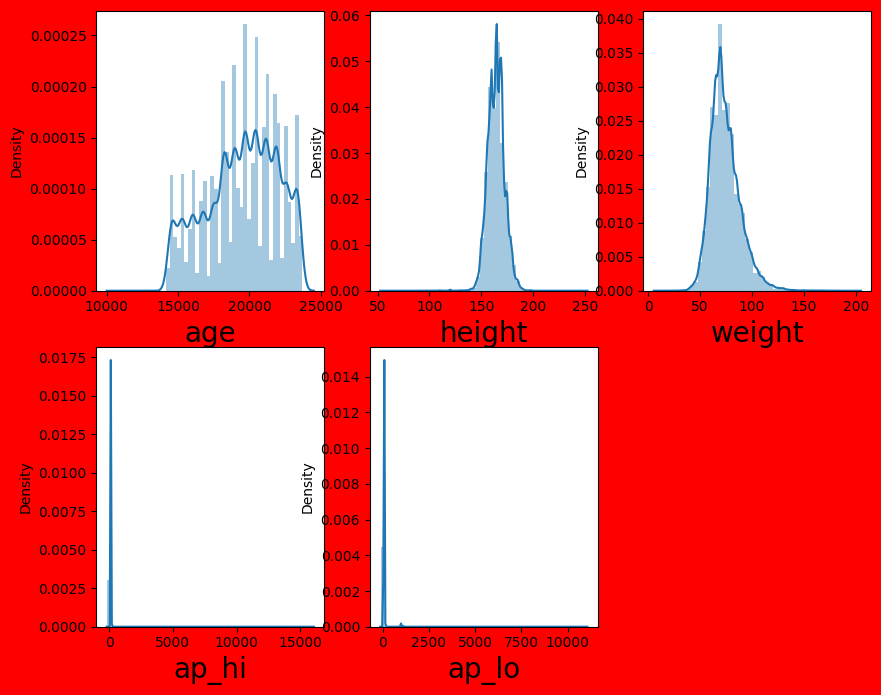

In [ ]:
plt.figure(figsize=(10,8),facecolor='red')
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [ ]:
#With sid 3 lets see the stats
#From scipy import stats
#zscore=(x_mean)/std=>you have seen  this is Standard Scaler

#Z=(x-mean)/std
from scipy.stats import zscore


z_score=zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score=np.abs(z_score)#apply the formula and you get the scaled data
filtering_entry=(abs_z_score < 3).all(axis=1)
df=df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


Check How much Skewness we removed.

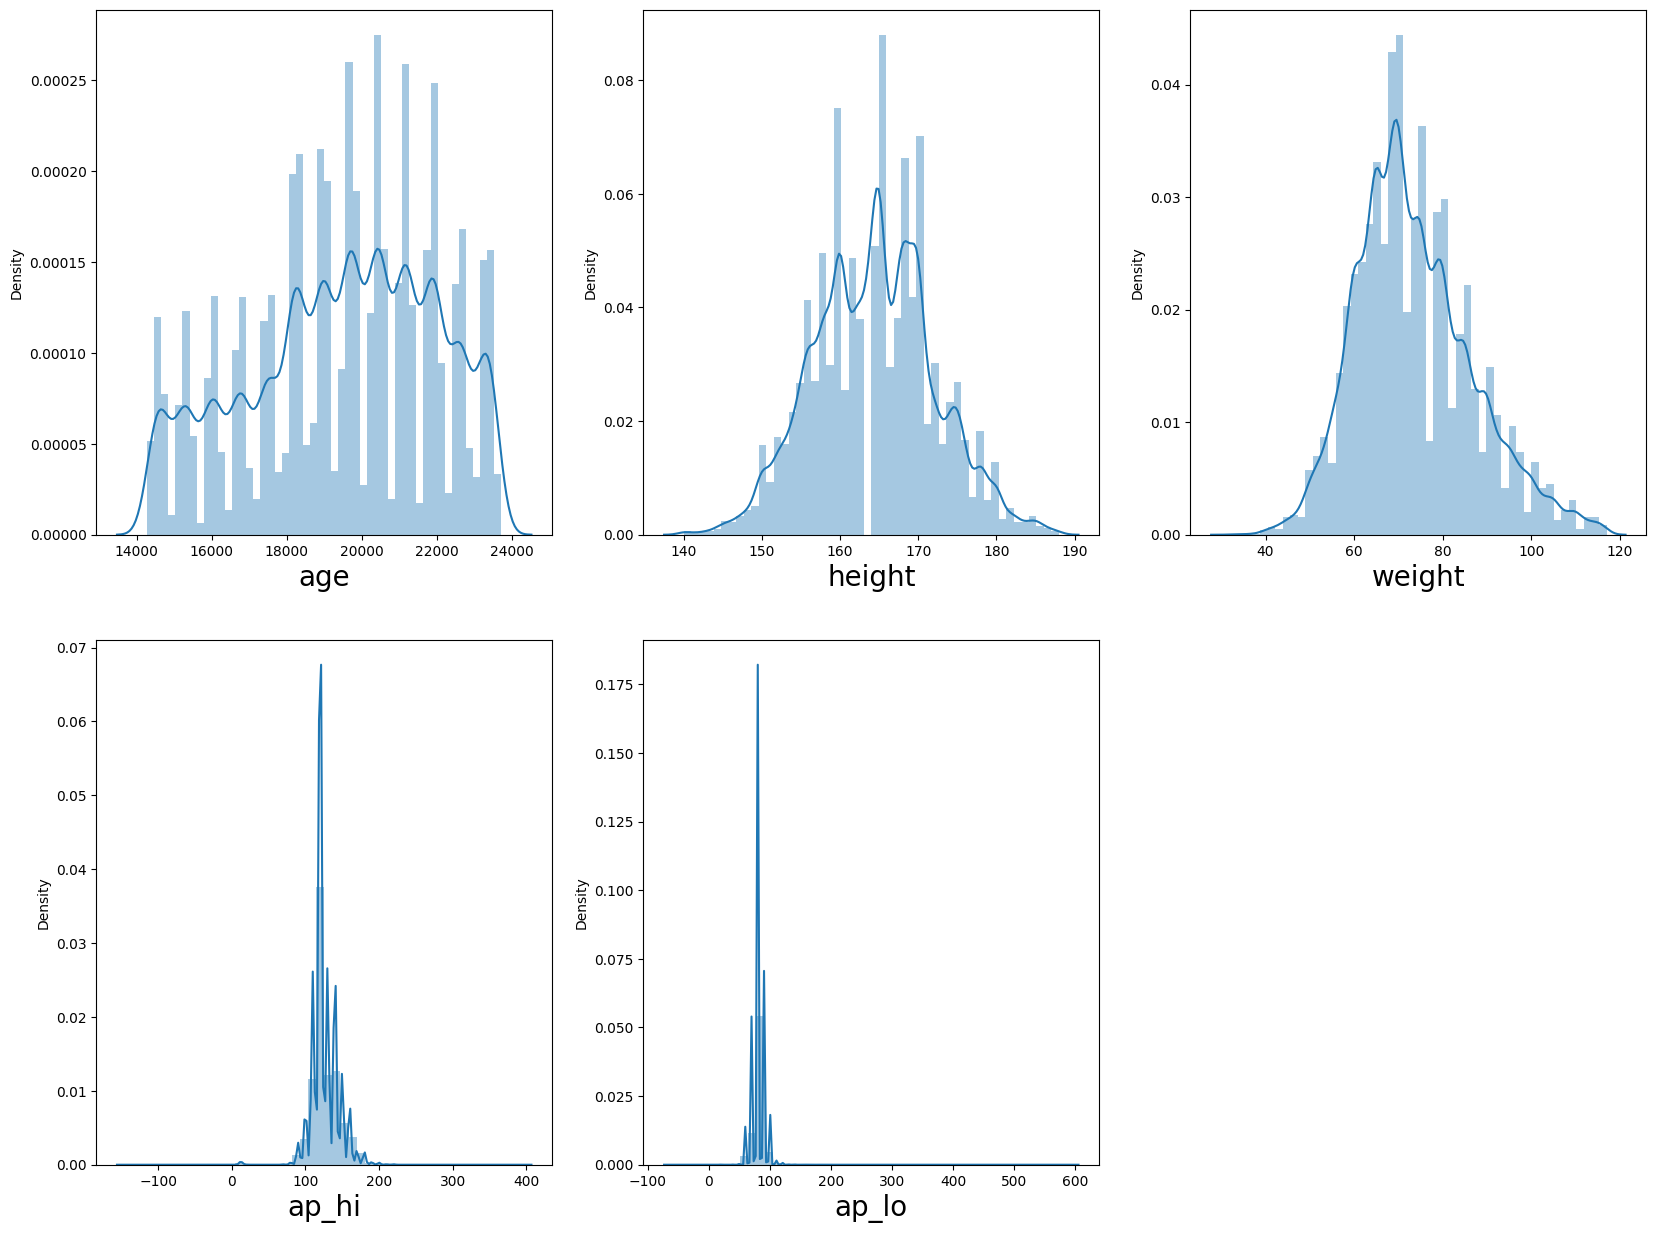

In [ ]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [ ]:
#Cannot make out much from the above plots
#Lets build Model

x=df.drop(columns=['cardio'])
y=df.cardio

# Split into Train Test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=94255)

# Model Confidence/Accuracy

In [ ]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("=================Training Score===============")
        print("Accuracy Score ==> ",accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Testing Score===============")
        print("Accuracy Score ==> ",accuracy_score(y_test,pred)*100)
        print("Classification Report==> ", classification_report(y_test,pred))

# Initiate DecisionTreeClassifier with new parameter and Train

In [ ]:
random_clf =RandomForestClassifier()

In [ ]:
#Train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#Call the fucntion and pass dataset to check train and test score

In [ ]:
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)

=================Training Score===============
Accuracy Score ==>  99.98218527315915
=================Testing Score===============
Accuracy Score ==>  71.49643705463184
Classification Report==>                precision    recall  f1-score   support

           0       0.71      0.74      0.72      8569
           1       0.72      0.69      0.71      8271

    accuracy                           0.71     16840
   macro avg       0.72      0.71      0.71     16840
weighted avg       0.72      0.71      0.71     16840



So , Our Model is Overfitted . Using GridSearchCV we will tune our parameter so here what parameter you can use . So this random Forest will use internally Decision Tree by default .


When it is using a decision tree algorithm base estimator so obeviously the parameter are related to decision tree  only . Only One parameter we are going to add .one new parameter is . How much Decision Tree We want "n_estimator":[]

# Lets tune the parameter using GridSearchCV

In [ ]:
#Random Forest Classifier
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,13],
       'min_samples_leaf':[5,8]}

grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print("Best_Params ==> ",grd.best_params_)

Best_Params ==>  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 15}


In [ ]:
random_clf=grd.best_estimator_ #reinstantiating with best params
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=13, n_estimators=15)

In [ ]:
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)

=================Training Score===============
Accuracy Score ==>  74.74069675376089
=================Testing Score===============
Accuracy Score ==>  73.48574821852732
Classification Report==>                precision    recall  f1-score   support

           0       0.71      0.80      0.75      8569
           1       0.76      0.67      0.71      8271

    accuracy                           0.73     16840
   macro avg       0.74      0.73      0.73     16840
weighted avg       0.74      0.73      0.73     16840



In [ ]:
#Note - > You can improve the peformance by tweaking processing methods

# Lets Plot ROC AUC Curve ti choose best model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.metrics import roc_curve, RocCurveDisplay

In [ ]:
from sklearn.metrics import r

In [ ]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [ ]:
#Train Test Split

In [ ]:
x=df.drop(columns=['cardio'],axis=1)
y=df.cardio

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=94062)

In [ ]:
#Training with all classifiers
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
print("All Models are Trained")

All Models are Trained


# Lets Check ROC AUC Curve for the fitted Model

- True Positive Rate(TPR)=Out OF 100 actual cardio patients how many our model predicted as cardio patients correctly (Higher The Better)


- False Positive Rate (FPR)=How many people were predicted as cardio patients but in reality they were healthy (Lower the Better)





Since it is difficult to evaluate the score based on only TPR and FPR data. There comes AUC.

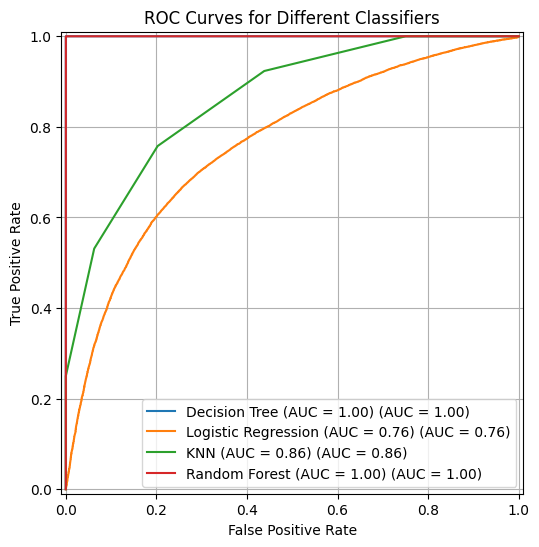

In [ ]:
plt.figure(figsize=(8, 6))

for clf, label in zip(classifiers, labels):
    y_score = clf.predict_proba(x_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_score)
    auc = roc_auc_score(y_train, y_score)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=f'{label} (AUC = {auc:.2f})')
    roc_display.plot(ax=plt.gca())

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# How well our model on test data.

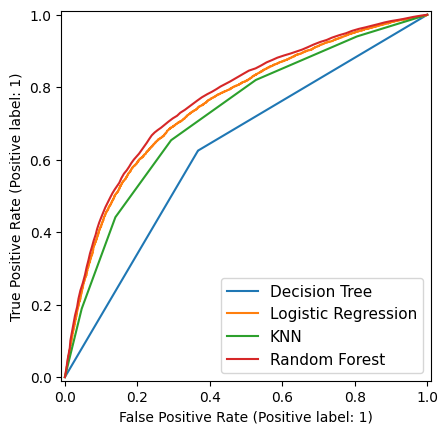

In [ ]:
# Create the display object
disp = RocCurveDisplay.from_estimator(dt, x_test, y_test)

# Plot ROC curve for logistic regression
RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=disp.ax_)

# Plot ROC curve for k-nearest neighbors
RocCurveDisplay.from_estimator(knn, x_test, y_test, ax=disp.ax_)

# Plot ROC curve for random forest
RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=disp.ax_)

# Add legend
plt.legend(["Decision Tree", "Logistic Regression", "KNN", "Random Forest"], prop={'size': 11}, loc='lower right',)

# Show the plot
plt.show()